# Clustering - KMEANS
* Simple code for kmeans Clustering 
* Supporting graphs for cluster size selection
* dataset: iris

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

# Creating 20 random initial centroids
kmeans = KMeans(n_clusters=20, init='random', n_init=1, max_iter=1, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, 
                n_jobs=None, algorithm='auto')

kmeans.fit(x)


init_centroids = kmeans.cluster_centers_

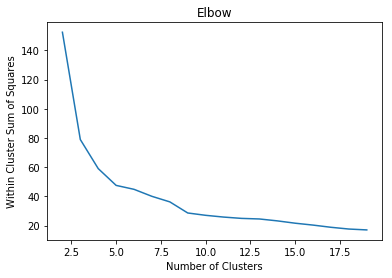

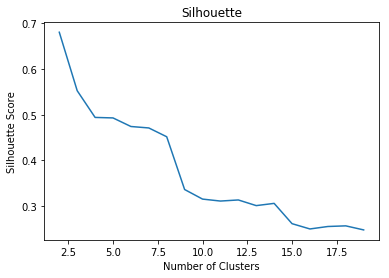

In [3]:
k_values = range(2,20)

first=True

for k in k_values:
    kmeans = KMeans(n_clusters=k, init=init_centroids[0:k,:], n_init=1, max_iter=10, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=42, copy_x=True, 
                n_jobs=None, algorithm='auto')
    cluster_labels = kmeans.fit_predict(x)
    score_wss = round(kmeans.inertia_ ,1)
    silhouette = round(silhouette_score(x, cluster_labels),4)
    aux_results = {'score_wss': score_wss, 'silhouette': silhouette}
    aux_results = pd.DataFrame(aux_results, index = [k])
    if first == True:
        final_results = aux_results
        first = False
    else:
        final_results = pd.concat([final_results, aux_results],axis =0)
        
plt.plot(final_results.index,final_results.score_wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow')
plt.show()

plt.plot(final_results.index,final_results.silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [4]:
print(final_results)

    score_wss  silhouette
2       152.4      0.6808
3        78.9      0.5526
4        59.0      0.4940
5        47.5      0.4929
6        44.8      0.4741
7        40.0      0.4709
8        36.2      0.4516
9        28.6      0.3359
10       27.0      0.3149
11       25.8      0.3106
12       24.9      0.3130
13       24.5      0.3006
14       23.2      0.3055
15       21.6      0.2610
16       20.3      0.2494
17       18.8      0.2548
18       17.6      0.2562
19       17.0      0.2473
